In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler

# Label Encoding
from sklearn.preprocessing import LabelEncoder
# Modeling & Accuracy Metrics
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
#reading data
data=pd.read_csv("H2HBABBA1533.csv")

In [3]:
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200895843,US,2019-09-09 00:00:00,2019.0,1.929776e+09,2019-08-22,20190822,20190822,20190906.0,USD,RV,1.0,NaN,41386.61,20190822.0,NAA8,1.929776e+09,0
1,U001,0200769623,WAL-MAR,2019-11-25 00:00:00,2019.0,1.930144e+09,2019-11-12,20191112,20191112,20191127.0,USD,RV,1.0,NaN,47178.82,20191112.0,NAH4,1.930144e+09,0
2,U001,0200769623,WAL-MAR foundation,2019-04-23 00:00:00,2019.0,1.929131e+09,2019-04-12,20190411,20190412,20190427.0,USD,RV,1.0,NaN,51389.52,20190412.0,NAH4,1.929131e+09,0
3,U001,0200769623,WAL-MAR co,2019-11-26 00:00:00,2019.0,1.930124e+09,2019-11-15,20191107,20191115,20191130.0,USD,RV,1.0,NaN,18177.18,20191115.0,NAH4,1.930124e+09,0
4,U001,0200769623,WAL-MAR,NaN,2020.0,1.930737e+09,2020-04-03,20200403,20200403,20200418.0,USD,RV,1.0,NaN,24079.57,20200403.0,NAH4,1.930737e+09,1


In [4]:
data.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    4
isOpen                        0
dtype: int64

## Separating the dataset based on Null values present in clear_date

In [5]:
#splitting the the test and train data based on the clear_data features
#A new data set is created based on 
Train = data.loc[data['clear_date'].notnull()]
Train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200895843,US,2019-09-09 00:00:00,2019.0,1.929776e+09,2019-08-22,20190822,20190822,20190906.0,USD,RV,1.0,NaN,41386.61,20190822.0,NAA8,1.929776e+09,0
1,U001,0200769623,WAL-MAR,2019-11-25 00:00:00,2019.0,1.930144e+09,2019-11-12,20191112,20191112,20191127.0,USD,RV,1.0,NaN,47178.82,20191112.0,NAH4,1.930144e+09,0
2,U001,0200769623,WAL-MAR foundation,2019-04-23 00:00:00,2019.0,1.929131e+09,2019-04-12,20190411,20190412,20190427.0,USD,RV,1.0,NaN,51389.52,20190412.0,NAH4,1.929131e+09,0
3,U001,0200769623,WAL-MAR co,2019-11-26 00:00:00,2019.0,1.930124e+09,2019-11-15,20191107,20191115,20191130.0,USD,RV,1.0,NaN,18177.18,20191115.0,NAH4,1.930124e+09,0
6,U001,0200707005,KING S foundation,2019-07-05 00:00:00,2019.0,1.929500e+09,2019-06-19,20190618,20190619,20190704.0,USD,RV,1.0,NaN,64532.95,20190619.0,NAA8,1.929500e+09,0


In [6]:
#Where clear_date == null is putted into test dataframe
Test = data.loc[data.clear_date.isnull()]
Test.shape

(10000, 19)

# Preprocessing the datasets

### 1. Null imputations

In [7]:
Train.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                    0
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             40000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    4
isOpen                        0
dtype: int64

In [8]:
#delete the  feature having high cardinality of null values
Train.drop(columns=['area_business'],inplace=True)

c:\users\telecom division\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [9]:
#check if  dupilcates are present in data
Train.duplicated().sum()

916

In [10]:
#deleteing dupicates
Train.drop_duplicates(keep =False,inplace  = True)

<ipython-input-10-fe9e07eae49e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train.drop_duplicates(keep =False,inplace  = True)


In [11]:
Train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200895843,US,2019-09-09 00:00:00,2019.0,1.929776e+09,2019-08-22,20190822,20190822,20190906.0,USD,RV,1.0,41386.61,20190822.0,NAA8,1.929776e+09,0
1,U001,0200769623,WAL-MAR,2019-11-25 00:00:00,2019.0,1.930144e+09,2019-11-12,20191112,20191112,20191127.0,USD,RV,1.0,47178.82,20191112.0,NAH4,1.930144e+09,0
2,U001,0200769623,WAL-MAR foundation,2019-04-23 00:00:00,2019.0,1.929131e+09,2019-04-12,20190411,20190412,20190427.0,USD,RV,1.0,51389.52,20190412.0,NAH4,1.929131e+09,0
3,U001,0200769623,WAL-MAR co,2019-11-26 00:00:00,2019.0,1.930124e+09,2019-11-15,20191107,20191115,20191130.0,USD,RV,1.0,18177.18,20191115.0,NAH4,1.930124e+09,0
6,U001,0200707005,KING S foundation,2019-07-05 00:00:00,2019.0,1.929500e+09,2019-06-19,20190618,20190619,20190704.0,USD,RV,1.0,64532.95,20190619.0,NAA8,1.929500e+09,0


In [12]:
#check for any constant features are present or not
#check for any constant features are present or not
Train.nunique()

business_code                 6
cust_number                1329
name_customer              3902
clear_date                  397
buisness_year                 2
doc_id                    38188
posting_date                422
document_create_date        427
document_create_date.1      422
due_in_date                 488
invoice_currency              2
document type                 2
posting_id                    1
total_open_amount         34720
baseline_create_date        430
cust_payment_terms           70
invoice_id                38184
isOpen                        1
dtype: int64

In [13]:
#delete the constant features having unique value =1
Train.drop(columns=['posting_id', 'isOpen'],inplace=True)

c:\users\telecom division\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [14]:
# checkin for majority of data
Train["document type"].value_counts()

RV    38184
X2        4
Name: document type, dtype: int64

In [15]:
#since we are getting rv as 0.999 so it is of no use so we can delete it
Train.drop('document type',axis = 1,inplace = True)

In [16]:
Train.cov()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,invoice_id
buisness_year,1.128036e-01,-1.078817e+06,1.024214e+03,1.038290e+03,1.067753e+03,-6.505572e+01,1.039777e+03,-9.772410e+05
doc_id,-1.078817e+06,8.117146e+16,-6.420905e+09,-9.561109e+09,-1.247330e+10,1.929616e+12,-5.740184e+09,7.530327e+16
document_create_date,1.024214e+03,-6.420905e+09,1.038016e+07,1.016945e+07,9.862439e+06,-4.125727e+05,1.015448e+07,-5.296179e+09
document_create_date.1,1.038290e+03,-9.561109e+09,1.016945e+07,1.030150e+07,9.982877e+06,-5.521625e+05,1.028641e+07,-8.335616e+09
due_in_date,1.067753e+03,-1.247330e+10,9.862439e+06,9.982877e+06,1.063552e+07,-6.425103e+05,9.998253e+06,-1.113974e+10
total_open_amount,-6.505572e+01,1.929616e+12,-4.125727e+05,-5.521625e+05,-6.425103e+05,1.565705e+09,-4.018460e+05,1.943366e+12
baseline_create_date,1.039777e+03,-5.740184e+09,1.015448e+07,1.028641e+07,9.998253e+06,-4.018460e+05,1.030442e+07,-4.511708e+09
invoice_id,-9.772410e+05,7.530327e+16,-5.296179e+09,-8.335616e+09,-1.113974e+10,1.943366e+12,-4.511708e+09,7.530327e+16


In [17]:
# Since 'document_create_date','buisness_year','invoice_id','baseline_create_date' are corelated with others 
# so we can drop these features

Train.drop(columns=['document_create_date','invoice_id','baseline_create_date'],inplace=True)

c:\users\telecom division\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [18]:
# a new list in created discarding the object datatype 
temp_data = Train.drop(labels=['cust_number','business_code','name_customer','clear_date','posting_date','invoice_currency','cust_payment_terms'], axis=1)
temp_data.dtypes

buisness_year             float64
doc_id                    float64
document_create_date.1      int64
due_in_date               float64
total_open_amount         float64
dtype: object

In [19]:
#checking for quasi-constant 
s = VarianceThreshold(
    threshold=0.01)

s.fit(temp_data)
sum(s.get_support())

5

In [20]:
#  print the quasi-constant features if Any 
print(
    len([
        x for x in temp_data.columns
        if x not in temp_data.columns[s.get_support()]
    ]))

[x for x in temp_data.columns if x not in temp_data.columns[s.get_support()]]

0


[]

### Date Time Conversion

In [21]:
#clear_date,posting_date,document_create_date.1,due_in_date are converted into datetime format for future operation
Train['clear_date'] = pd.to_datetime(Train['clear_date'])
Train['posting_date'] = pd.to_datetime(Train['posting_date']) 
Train['document_create_date.1'] = pd.to_datetime(Train['document_create_date.1'], format='%Y%m%d')
Train['due_in_date'] = pd.to_datetime(Train['due_in_date'], format='%Y%m%d')
Train.head()

<ipython-input-21-3578e788afa6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train['clear_date'] = pd.to_datetime(Train['clear_date'])
<ipython-input-21-3578e788afa6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train['posting_date'] = pd.to_datetime(Train['posting_date'])
<ipython-input-21-3578e788afa6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,cust_payment_terms
0,U001,0200895843,US,2019-09-09,2019.0,1.929776e+09,2019-08-22,2019-08-22,2019-09-06,USD,41386.61,NAA8
1,U001,0200769623,WAL-MAR,2019-11-25,2019.0,1.930144e+09,2019-11-12,2019-11-12,2019-11-27,USD,47178.82,NAH4
2,U001,0200769623,WAL-MAR foundation,2019-04-23,2019.0,1.929131e+09,2019-04-12,2019-04-12,2019-04-27,USD,51389.52,NAH4
3,U001,0200769623,WAL-MAR co,2019-11-26,2019.0,1.930124e+09,2019-11-15,2019-11-15,2019-11-30,USD,18177.18,NAH4
6,U001,0200707005,KING S foundation,2019-07-05,2019.0,1.929500e+09,2019-06-19,2019-06-19,2019-07-04,USD,64532.95,NAA8


In [22]:
Train[Train['invoice_currency'] == 'CAD'].head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,cust_payment_terms
36,CA02,0140104429,COSTCO co,2019-07-02,2019.0,2.960553e+09,2019-06-05,2019-06-05,2019-06-24,CAD,15993.34,CA10
94,CA02,0140106408,WAL-M us,2019-12-30,2019.0,2.960600e+09,2019-12-13,2019-12-13,2019-12-24,CAD,7396.29,CA10
100,CA02,0140104225,SAVE-ON- trust,2020-01-27,2020.0,2.960607e+09,2020-01-12,2020-01-12,2020-01-23,CAD,11960.95,CA10
121,CA02,0140104429,COSTCO foundation,2020-02-24,2020.0,2.960611e+09,2020-01-29,2020-01-29,2020-02-17,CAD,77860.06,CA10
125,CA02,0140104409,LOB us,2019-05-06,2019.0,2.960543e+09,2019-04-19,2019-04-19,2019-05-06,CAD,205577.97,CA10


In [23]:
#CAD in converted into USD and all the values are stored in new column Total-open-Amount 
Train['total_open_amount'] = np.where((Train['invoice_currency'] == 'CAD') ,((Train['total_open_amount'])*0.78),(Train['total_open_amount']))

<ipython-input-23-658cd7fb7abd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train['total_open_amount'] = np.where((Train['invoice_currency'] == 'CAD') ,((Train['total_open_amount'])*0.78),(Train['total_open_amount']))


In [24]:
# All the CAD is converted to USD
Train['invoice_currency'] = 'USD'
Train.head()

<ipython-input-24-f38f80f5aa42>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train['invoice_currency'] = 'USD'


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,cust_payment_terms
0,U001,0200895843,US,2019-09-09,2019.0,1.929776e+09,2019-08-22,2019-08-22,2019-09-06,USD,41386.61,NAA8
1,U001,0200769623,WAL-MAR,2019-11-25,2019.0,1.930144e+09,2019-11-12,2019-11-12,2019-11-27,USD,47178.82,NAH4
2,U001,0200769623,WAL-MAR foundation,2019-04-23,2019.0,1.929131e+09,2019-04-12,2019-04-12,2019-04-27,USD,51389.52,NAH4
3,U001,0200769623,WAL-MAR co,2019-11-26,2019.0,1.930124e+09,2019-11-15,2019-11-15,2019-11-30,USD,18177.18,NAH4
6,U001,0200707005,KING S foundation,2019-07-05,2019.0,1.929500e+09,2019-06-19,2019-06-19,2019-07-04,USD,64532.95,NAA8


In [25]:
Train['invoice_currency'].unique()

array(['USD'], dtype=object)

In [26]:
#since the invoice_currency becomes a constant so it is of no use thus dropped
Train.drop(columns=['invoice_currency'],inplace=True)


c:\users\telecom division\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [27]:
#calculate the delay feature using clear_date-due_date
#DELAY is calculated by (clear_date-due_in_date)
Train['DELAY']=Train['clear_date'] - Train['due_in_date']
Train.head()

<ipython-input-27-10028587da12>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train['DELAY']=Train['clear_date'] - Train['due_in_date']


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,total_open_amount,cust_payment_terms,DELAY
0,U001,0200895843,US,2019-09-09,2019.0,1.929776e+09,2019-08-22,2019-08-22,2019-09-06,41386.61,NAA8,3 days
1,U001,0200769623,WAL-MAR,2019-11-25,2019.0,1.930144e+09,2019-11-12,2019-11-12,2019-11-27,47178.82,NAH4,-2 days
2,U001,0200769623,WAL-MAR foundation,2019-04-23,2019.0,1.929131e+09,2019-04-12,2019-04-12,2019-04-27,51389.52,NAH4,-4 days
3,U001,0200769623,WAL-MAR co,2019-11-26,2019.0,1.930124e+09,2019-11-15,2019-11-15,2019-11-30,18177.18,NAH4,-4 days
6,U001,0200707005,KING S foundation,2019-07-05,2019.0,1.929500e+09,2019-06-19,2019-06-19,2019-07-04,64532.95,NAA8,1 days


In [28]:
#sort the train data according to document_create_date.1 as we can't train model based on future data
Train.sort_values(['posting_date'],inplace=True)
Train.reset_index(inplace=True,drop=True)
Train.head()

<ipython-input-28-66f277afb696>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train.sort_values(['posting_date'],inplace=True)


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,total_open_amount,cust_payment_terms,DELAY
0,U001,0200726979,BJ'S foundation,2019-01-15,2019.0,1.928540e+09,2018-12-30,2018-12-30,2019-01-14,42.04,NAA8,1 days
1,U001,0200769623,WAL-MAR systems,2019-01-09,2019.0,1.928538e+09,2018-12-30,2018-12-30,2019-01-14,5433.68,NAH4,-5 days
2,U001,0200744019,TARG trust,2019-01-18,2019.0,1.928542e+09,2018-12-30,2018-12-30,2019-01-14,11982.59,NAA8,4 days
3,U001,0200744019,TARG foundation,2019-01-18,2019.0,1.928540e+09,2018-12-30,2018-12-30,2019-01-14,5878.67,NAA8,4 days
4,U001,0200779906,BOZZU us,2019-01-16,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,110569.17,NAA8,2 days


In [29]:
# Converting the Train into X and y so that we can pass it onto train_test_split function for splitting

X = Train.drop('DELAY',axis=1)

y = Train['DELAY']

In [30]:
#splitting the data first into two part -- doing a 7:3 split 
X_train,X_inter_test,y_train,y_inter_test = train_test_split(X,y,test_size=0.3,random_state=0 , shuffle = False)

In [31]:
# 
X_val,X_test,y_val,y_test = train_test_split(X_inter_test,y_inter_test,test_size=0.5,random_state=0 , shuffle = False)

In [32]:
X_train.shape , X_val.shape , X_test.shape

((26731, 11), (5728, 11), (5729, 11))

# EDA

<AxesSubplot:>

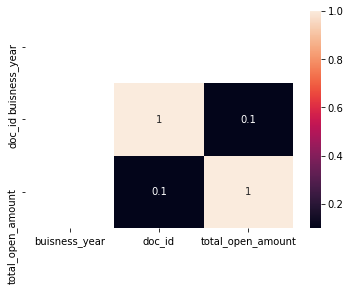

In [33]:
# corelation plot is done to eliminate some highly coorelated features
cor =X_train.corr()
sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns, annot=True)

c:\users\telecom division\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DELAY', ylabel='Density'>

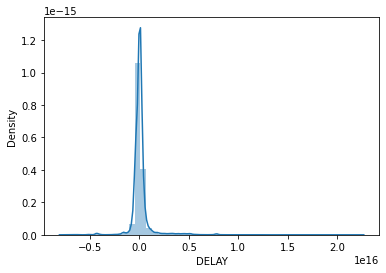

In [34]:
# distribution of the target column 
sns.distplot(y_train)

#### From this  Graph we infered that that delay feature is perfectly skewed having very less outliers which we can handle through normalization

In [35]:
X_train.merge(y_train,on = X_train.index)

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,total_open_amount,cust_payment_terms,DELAY
0,0,U001,0200726979,BJ'S foundation,2019-01-15,2019.0,1.928540e+09,2018-12-30,2018-12-30,2019-01-14,42.0400,NAA8,1 days
1,1,U001,0200769623,WAL-MAR systems,2019-01-09,2019.0,1.928538e+09,2018-12-30,2018-12-30,2019-01-14,5433.6800,NAH4,-5 days
2,2,U001,0200744019,TARG trust,2019-01-18,2019.0,1.928542e+09,2018-12-30,2018-12-30,2019-01-14,11982.5900,NAA8,4 days
3,3,U001,0200744019,TARG foundation,2019-01-18,2019.0,1.928540e+09,2018-12-30,2018-12-30,2019-01-14,5878.6700,NAA8,4 days
4,4,U001,0200779906,BOZZU us,2019-01-16,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,110569.1700,NAA8,2 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26726,26726,CA02,0140106302,GR JEA co,2019-11-06,2019.0,2.960585e+09,2019-10-06,2019-10-06,2019-10-19,13103.7504,CA10,18 days
26727,26727,U001,0200707822,PUBLI,2019-11-15,2019.0,1.929976e+09,2019-10-06,2019-10-06,2019-11-15,1601.8700,NAWU,0 days
26728,26728,U001,0200759878,SA systems,2019-10-22,2019.0,1.929968e+09,2019-10-06,2019-10-06,2019-10-21,3800.5700,NAH4,1 days
26729,26729,U001,0100004536,BAS co,2019-11-15,2019.0,1.929974e+09,2019-10-06,2019-10-06,2019-11-15,1620.2900,NAWU,0 days


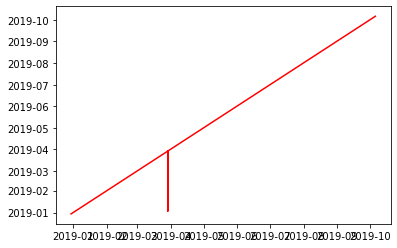

In [36]:
plt.plot_date(X_train['posting_date'], X_train['document_create_date.1'],'r')
plt.show()

In [37]:
#since 'posting_date' ,'document_create_date.1'  features data are almost same so we can ignore either of feature
X_train.drop(columns=['posting_date'],inplace=True)

c:\users\telecom division\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


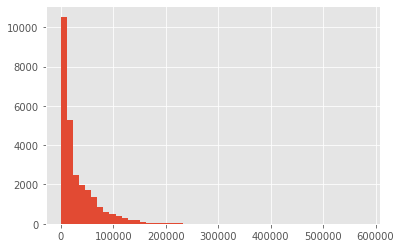

In [38]:
plt.style.use('ggplot')
plt.hist(X_train['total_open_amount'],bins=50)
plt.show()

#### From this graph we can say that Total amount is left skewed and also it has quite lesser outliers that we can handle it through standardization

In [39]:
# checkin for Outliers in total_open_amount  present
from scipy.stats import zscore
z_scores = zscore(X_train['total_open_amount'])
abs_z_scores = np.abs(z_scores)
out=pd.DataFrame(np.where(abs_z_scores<3,'Not Outlier','Outlier'))
out.value_counts()

Not Outlier    26243
Outlier          488
dtype: int64

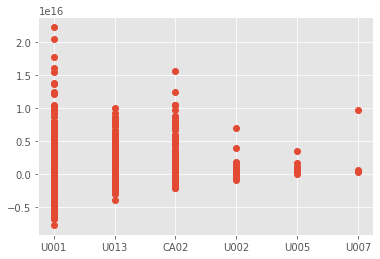

In [40]:
plt.plot_date(X_train['business_code'], y_train, )
plt.show()

#### This Graph states that one having business code as U001 makes that highest delay in paying the dues 

# Features Engineering

In [41]:
# month_quarter,month are calculated for further use in model prediction
X_train['document_create_date.1_month-in-quarter'] = X_train['document_create_date.1'].dt.quarter
X_train['document_create_date.-in-_month'] = X_train['document_create_date.1'].dt.month
X_train['document_create_date.-in_daysofweek'] = X_train['document_create_date.1'].dt.dayofweek
X_train['due_in_date-in-month'] = X_train['due_in_date'].dt.month
X_train['due_in_date-in-days'] =X_train['due_in_date'].dt.day
X_train['due_in_date-in-days'] =X_train['due_in_date'].dt.quarter

<ipython-input-41-dfa0ba82e1a7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['document_create_date.1_month-in-quarter'] = X_train['document_create_date.1'].dt.quarter
<ipython-input-41-dfa0ba82e1a7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['document_create_date.-in-_month'] = X_train['document_create_date.1'].dt.month
<ipython-input-41-dfa0ba82e1a7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [42]:
#we have separated the feature document create date so now we can drop this feature
X_train.drop('document_create_date.1',axis =1,inplace =True)

c:\users\telecom division\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [43]:
X_train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,due_in_date,total_open_amount,cust_payment_terms,document_create_date.1_month-in-quarter,document_create_date.-in-_month,document_create_date.-in_daysofweek,due_in_date-in-month,due_in_date-in-days
0,U001,0200726979,BJ'S foundation,2019-01-15,2019.0,1.928540e+09,2019-01-14,42.04,NAA8,4,12,6,1,1
1,U001,0200769623,WAL-MAR systems,2019-01-09,2019.0,1.928538e+09,2019-01-14,5433.68,NAH4,4,12,6,1,1
2,U001,0200744019,TARG trust,2019-01-18,2019.0,1.928542e+09,2019-01-14,11982.59,NAA8,4,12,6,1,1
3,U001,0200744019,TARG foundation,2019-01-18,2019.0,1.928540e+09,2019-01-14,5878.67,NAA8,4,12,6,1,1
4,U001,0200779906,BOZZU us,2019-01-16,2019.0,1.928541e+09,2019-01-14,110569.17,NAA8,4,12,6,1,1


In [44]:
#Since we have derived the delay from claer date and due date so we can drop the those features
X_train.drop(columns=['clear_date','due_in_date'],inplace=True)
X_train.head()

c:\users\telecom division\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,business_code,cust_number,name_customer,buisness_year,doc_id,total_open_amount,cust_payment_terms,document_create_date.1_month-in-quarter,document_create_date.-in-_month,document_create_date.-in_daysofweek,due_in_date-in-month,due_in_date-in-days
0,U001,0200726979,BJ'S foundation,2019.0,1.928540e+09,42.04,NAA8,4,12,6,1,1
1,U001,0200769623,WAL-MAR systems,2019.0,1.928538e+09,5433.68,NAH4,4,12,6,1,1
2,U001,0200744019,TARG trust,2019.0,1.928542e+09,11982.59,NAA8,4,12,6,1,1
3,U001,0200744019,TARG foundation,2019.0,1.928540e+09,5878.67,NAA8,4,12,6,1,1
4,U001,0200779906,BOZZU us,2019.0,1.928541e+09,110569.17,NAA8,4,12,6,1,1


In [45]:
#before label encoding we dropped the customer name as customer name is same as cust-id 
X_train.drop('name_customer',axis = 1,inplace =True)

c:\users\telecom division\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [46]:
X_train.head()

,business_code,cust_number,buisness_year,doc_id,total_open_amount,cust_payment_terms,document_create_date.1_month-in-quarter,document_create_date.-in-_month,document_create_date.-in_daysofweek,due_in_date-in-month,due_in_date-in-days
0,U001,0200726979,2019.0,1.928540e+09,42.04,NAA8,4,12,6,1,1
1,U001,0200769623,2019.0,1.928538e+09,5433.68,NAH4,4,12,6,1,1
2,U001,0200744019,2019.0,1.928542e+09,11982.59,NAA8,4,12,6,1,1
3,U001,0200744019,2019.0,1.928540e+09,5878.67,NAA8,4,12,6,1,1
4,U001,0200779906,2019.0,1.928541e+09,110569.17,NAA8,4,12,6,1,1


In [47]:
#since some features are catagorical  we have done label-encoding so that we can pass to model 
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X_train.iloc[:,0] = labelencoder.fit_transform(X_train.iloc[:,0])
X_train.iloc[:,1] = labelencoder.fit_transform(X_train.iloc[:,1])
X_train.iloc[:,3] = labelencoder.fit_transform(X_train.iloc[:,3])
X_train.iloc[:,5] = labelencoder.fit_transform(X_train.iloc[:,6])

c:\users\telecom division\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [48]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26731 entries, 0 to 26730
Data columns (total 11 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   business_code                            26731 non-null  int32  
 1   cust_number                              26731 non-null  int32  
 2   buisness_year                            26731 non-null  float64
 3   doc_id                                   26731 non-null  int64  
 4   total_open_amount                        26731 non-null  float64
 5   cust_payment_terms                       26731 non-null  int64  
 6   document_create_date.1_month-in-quarter  26731 non-null  int64  
 7   document_create_date.-in-_month          26731 non-null  int64  
 8   document_create_date.-in_daysofweek      26731 non-null  int64  
 9   due_in_date-in-month                     26731 non-null  int64  
 10  due_in_date-in-days                      26731

#### Mapping the features with x_val and X_test 

In [49]:
# month_quarter,month are calculated for further use in model prediction
X_val['document_create_date.1_month-in-quarter'] = X_val['document_create_date.1'].dt.quarter
X_val['document_create_date.-in-_month'] = X_val['document_create_date.1'].dt.month
X_val['document_create_date.-in_daysofweek'] = X_val['document_create_date.1'].dt.dayofweek
X_val['due_in_date-in-month'] = X_val['due_in_date'].dt.month
X_val['due_in_date-in-days'] =X_val['due_in_date'].dt.day
X_val['due_in_date-in-days'] =X_val['due_in_date'].dt.quarter

<ipython-input-49-60413aae169c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val['document_create_date.1_month-in-quarter'] = X_val['document_create_date.1'].dt.quarter
<ipython-input-49-60413aae169c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val['document_create_date.-in-_month'] = X_val['document_create_date.1'].dt.month
<ipython-input-49-60413aae169c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [50]:
#Since we have derived the delay from claer date and due date so we can drop the those features
X_val.drop(columns=['clear_date','due_in_date'],inplace=True)
X_val.head()

c:\users\telecom division\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date.1,total_open_amount,cust_payment_terms,document_create_date.1_month-in-quarter,document_create_date.-in-_month,document_create_date.-in_daysofweek,due_in_date-in-month,due_in_date-in-days
26731,U001,0200726979,BJ'S in,2019.0,1.929974e+09,2019-10-06,2019-10-06,183.29,NAA8,4,10,6,10,4
26732,U001,0200744019,TARG co,2019.0,1.929969e+09,2019-10-06,2019-10-06,21923.14,NAA8,4,10,6,10,4
26733,U001,0200769623,WAL-MAR foundation,2019.0,1.929974e+09,2019-10-06,2019-10-06,57816.02,NAH4,4,10,6,10,4
26734,U001,0200769623,WAL-MAR foundation,2019.0,1.929977e+09,2019-10-06,2019-10-06,15897.65,NAH4,4,10,6,10,4
26735,U001,0200769623,WAL-MAR systems,2019.0,1.929973e+09,2019-10-06,2019-10-06,8538.94,NAH4,4,10,6,10,4


In [51]:
#we have separated the feature document create date so now we can drop this feature
X_val.drop('document_create_date.1',axis =1,inplace =True)

c:\users\telecom division\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [52]:
#before label encoding we dropped the customer name as customer name is same as cust-id 
X_val.drop('name_customer',axis = 1,inplace =True)

In [53]:
#since some features are catagorical  we have done label-encoding so that we can pass to model 
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X_val.iloc[:,0] = labelencoder.fit_transform(X_val.iloc[:,0])
X_val.iloc[:,1] = labelencoder.fit_transform(X_val.iloc[:,1])
X_val.iloc[:,3] = labelencoder.fit_transform(X_val.iloc[:,3])
X_val.iloc[:,6] = labelencoder.fit_transform(X_val.iloc[:,6])

c:\users\telecom division\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [54]:
X_val.head()

,business_code,cust_number,buisness_year,doc_id,posting_date,total_open_amount,cust_payment_terms,document_create_date.1_month-in-quarter,document_create_date.-in-_month,document_create_date.-in_daysofweek,due_in_date-in-month,due_in_date-in-days
26731,1,311,2019.0,69,2019-10-06,183.29,11,4,10,6,10,4
26732,1,340,2019.0,42,2019-10-06,21923.14,11,4,10,6,10,4
26733,1,379,2019.0,64,2019-10-06,57816.02,23,4,10,6,10,4
26734,1,379,2019.0,136,2019-10-06,15897.65,23,4,10,6,10,4
26735,1,379,2019.0,62,2019-10-06,8538.94,23,4,10,6,10,4


In [55]:
X_val.drop(columns=['posting_date'],inplace=True)

c:\users\telecom division\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [56]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5728 entries, 26731 to 32458
Data columns (total 11 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   business_code                            5728 non-null   int32  
 1   cust_number                              5728 non-null   int32  
 2   buisness_year                            5728 non-null   float64
 3   doc_id                                   5728 non-null   int64  
 4   total_open_amount                        5728 non-null   float64
 5   cust_payment_terms                       5728 non-null   int32  
 6   document_create_date.1_month-in-quarter  5728 non-null   int64  
 7   document_create_date.-in-_month          5728 non-null   int64  
 8   document_create_date.-in_daysofweek      5728 non-null   int64  
 9   due_in_date-in-month                     5728 non-null   int64  
 10  due_in_date-in-days                      57

In [57]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26731 entries, 0 to 26730
Data columns (total 11 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   business_code                            26731 non-null  int32  
 1   cust_number                              26731 non-null  int32  
 2   buisness_year                            26731 non-null  float64
 3   doc_id                                   26731 non-null  int64  
 4   total_open_amount                        26731 non-null  float64
 5   cust_payment_terms                       26731 non-null  int64  
 6   document_create_date.1_month-in-quarter  26731 non-null  int64  
 7   document_create_date.-in-_month          26731 non-null  int64  
 8   document_create_date.-in_daysofweek      26731 non-null  int64  
 9   due_in_date-in-month                     26731 non-null  int64  
 10  due_in_date-in-days                      26731

In [58]:
# month_quarter,month are calculated for further use in model prediction
X_test['document_create_date.1_month-in-quarter'] = X_test['document_create_date.1'].dt.quarter
X_test['document_create_date.-in-_month'] = X_test['document_create_date.1'].dt.month
X_test['document_create_date.-in_daysofweek'] = X_test['document_create_date.1'].dt.dayofweek
X_test['due_in_date-in-month'] = X_test['due_in_date'].dt.month
X_test['due_in_date-in-days'] =X_test['due_in_date'].dt.day
X_test['due_in_date-in-days'] =X_test['due_in_date'].dt.quarter

<ipython-input-58-51c8bc446187>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['document_create_date.1_month-in-quarter'] = X_test['document_create_date.1'].dt.quarter
<ipython-input-58-51c8bc446187>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['document_create_date.-in-_month'] = X_test['document_create_date.1'].dt.month
<ipython-input-58-51c8bc446187>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [59]:
#Since we have derived the delay from claer date and due date so we can drop the those features
X_test.drop(columns=['clear_date','due_in_date'],inplace=True)
X_test.head()

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date.1,total_open_amount,cust_payment_terms,document_create_date.1_month-in-quarter,document_create_date.-in-_month,document_create_date.-in_daysofweek,due_in_date-in-month,due_in_date-in-days
32459,U001,0200790107,ROU systems,2019.0,1.930252e+09,2019-12-09,2019-12-09,117355.4400,NAC6,4,12,0,12,4
32460,CA02,0140104340,COLABOR,2019.0,2.960598e+09,2019-12-09,2019-12-09,49785.2160,CA10,4,12,0,12,4
32461,U001,0200769623,WAL-MAR corporation,2019.0,1.930254e+09,2019-12-09,2019-12-09,42327.6400,NAH4,4,12,0,12,4
32462,U001,0200726979,BJ'S trust,2019.0,1.930252e+09,2019-12-09,2019-12-09,64.7400,NAA8,4,12,0,12,4
32463,CA02,0140106408,WAL-M co,2019.0,2.960598e+09,2019-12-09,2019-12-09,4923.9216,CA10,4,12,0,12,4


In [60]:
#we have separated the feature document create date so now we can drop this feature
X_test.drop('document_create_date.1',axis =1,inplace =True)

c:\users\telecom division\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [61]:
#before label encoding we dropped the customer name as customer name is same as cust-id 
X_test.drop('name_customer',axis = 1,inplace =True)

In [62]:
X_test.drop('posting_date',axis = 1,inplace =True)

In [63]:
#since some features are catagorical  we have done label-encoding so that we can pass to model 
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X_test.iloc[:,0] = labelencoder.fit_transform(X_test.iloc[:,0])
X_test.iloc[:,1] = labelencoder.fit_transform(X_test.iloc[:,1])
X_test.iloc[:,3] = labelencoder.fit_transform(X_test.iloc[:,3])
X_test.iloc[:,5] = labelencoder.fit_transform(X_test.iloc[:,5])

c:\users\telecom division\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [64]:
X_test.head()

,business_code,cust_number,buisness_year,doc_id,total_open_amount,cust_payment_terms,document_create_date.1_month-in-quarter,document_create_date.-in-_month,document_create_date.-in_daysofweek,due_in_date-in-month,due_in_date-in-days
32459,1,415,2019.0,56,117355.4400,17,4,12,0,12,4
32460,0,129,2019.0,5334,49785.2160,3,4,12,0,12,4
32461,1,380,2019.0,68,42327.6400,25,4,12,0,12,4
32462,1,316,2019.0,51,64.7400,12,4,12,0,12,4
32463,0,156,2019.0,5333,4923.9216,3,4,12,0,12,4


In [65]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5729 entries, 32459 to 38187
Data columns (total 11 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   business_code                            5729 non-null   int32  
 1   cust_number                              5729 non-null   int32  
 2   buisness_year                            5729 non-null   float64
 3   doc_id                                   5729 non-null   int64  
 4   total_open_amount                        5729 non-null   float64
 5   cust_payment_terms                       5729 non-null   int32  
 6   document_create_date.1_month-in-quarter  5729 non-null   int64  
 7   document_create_date.-in-_month          5729 non-null   int64  
 8   document_create_date.-in_daysofweek      5729 non-null   int64  
 9   due_in_date-in-month                     5729 non-null   int64  
 10  due_in_date-in-days                      57

# Feature Selection

In [70]:
#Extracting best features to be fed to train our model
from sklearn.ensemble import ExtraTreesClassifier
x=X_train
y= y_train
model = ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [71]:
#Normalization is performed before fitting inside model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_val)

In [73]:
# checking model in train_final
model_2 = SVR()
model_2.fit(X_train_scaled,y_train)
pred_value = model_2.predict(X_test_scaled)
print(f'score = {model_2.score(X_test_scaled,y_test)}')
print(f'r2_score = {r2_score(y_test,pred_value)}')
print(f'mean_squared_error = {mean_squared_error(y_test, pred_value,squared =False)}')
root_mean_square_error=sqrt(mean_squared_error(y_test, pred_value))
print(f'root_mean_square_error = {root_mean_square_error}')

ValueError: Found input variables with inconsistent numbers of samples: [5729, 5728]

In [69]:
pred_value   

array([ 42.73717546,  43.89804695,  88.70949657, ..., 137.05674052,
        52.29214362,  56.52035707])